<a href="https://colab.research.google.com/github/Santiago-R/aupa.ai/blob/main/00_Empieza_a_jugar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
def is_cat(img_name):
    return img_name[0].isupper()

In [5]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct = 0.2,
    label_func = is_cat,
    item_tfms = Resize(224)
)

In [6]:
learn = vision_learner(dls, resnet18, metrics=accuracy)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 138MB/s]


In [8]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.037309,0.023291,0.005413,01:04
1,0.029207,0.019483,0.005413,01:02


# Más detalles

In [10]:
learn.fit_one_cycle?

In [11]:
learn.fit_one_cycle??

Search 1Cycle policy  

https://towardsdatascience.com/finding-good-learning-rate-and-the-one-cycle-policy-7159fe1db5d6

In [15]:
learn = vision_learner(dls, resnet18, metrics=accuracy)

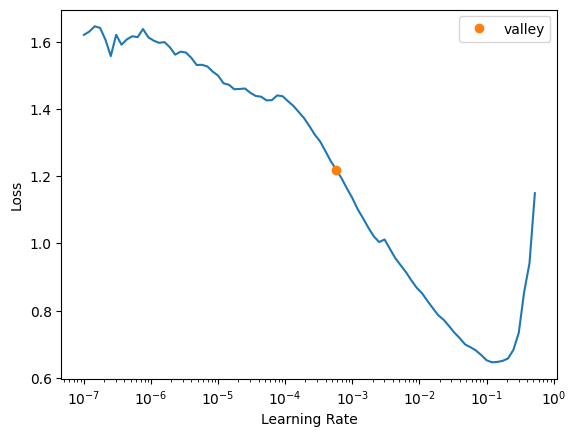

In [16]:
lr = learn.lr_find()
print(f'lr = {lr}')

In [ ]:
learn.fit_one_cycle(4, lr_max=lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.297111,0.037635,0.988498,00:58
1,0.108966,0.030408,0.993234,00:59
